In [73]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [74]:
pwd

'C:\\Users\\hp\\Downloads'

In [75]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Introduction
Medical expenses is one of the major recurring expenses in a human life.

Health insurance is an insurance product which covers medical and surgical expenses of an insured individual.

It reimbeurses the expenses incurred due toillness or injury or pays the care provider of the insured individual directly.

It is important because cost towards good medical facilities and hospitalisation can be financially stressful.

### Problem Statement
In the given Project we have to predict the insurance cost to make money.

Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population.

The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments.

In [76]:
## Visualise the first 5 records
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
## Visualise the last 5 records
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [78]:
# Random five recordes from data
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
876,49,female,27.100,1,no,southwest,26140.36030
105,20,male,28.025,1,yes,northwest,17560.37975
684,33,female,18.500,1,no,southwest,4766.02200
733,48,female,27.265,1,no,northeast,9447.25035
943,19,male,22.610,0,no,northwest,1628.47090


In [79]:
# Gives no. of rows and no. of columns using shape function
data.shape #(rows,column)

(1338, 7)

In [80]:
# Removing duplicates
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
# Checking is there any null value in our data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [82]:
# LIST THE TYPES OF ALL THE COLUMNS IN OUR DATASET.
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [83]:
# info gives information about data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
#To see information 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [85]:
from matplotlib import style

In [86]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


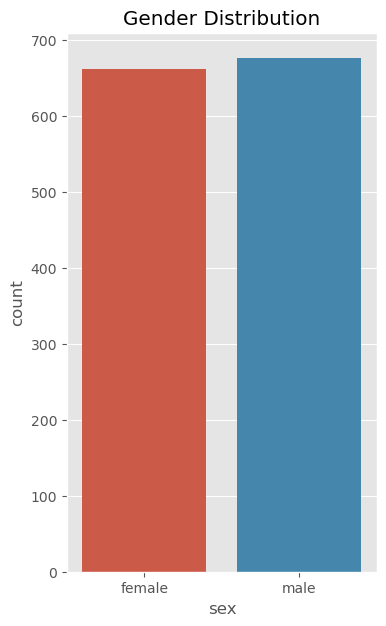

In [87]:
plt.figure(figsize=(4,7))
style.use('ggplot')
sns.countplot(data['sex'])
plt.title('Gender Distribution')
plt.show()

In [88]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


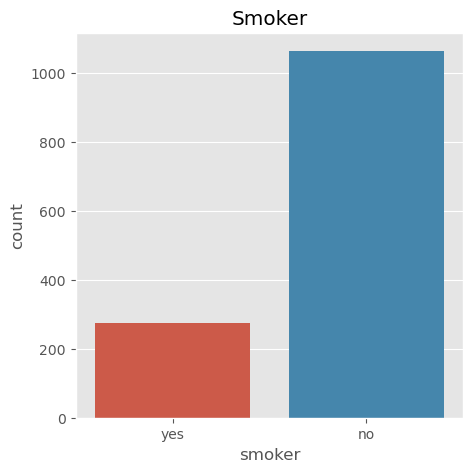

In [89]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(data['smoker'])
plt.title('Smoker')
plt.show()

In [90]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


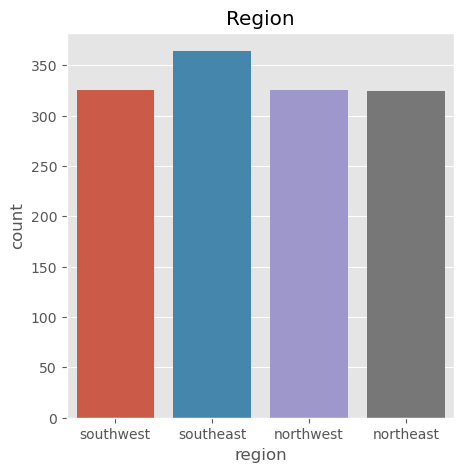

In [91]:
data['region'].value_counts()
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(data['region'])
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges vs Region')

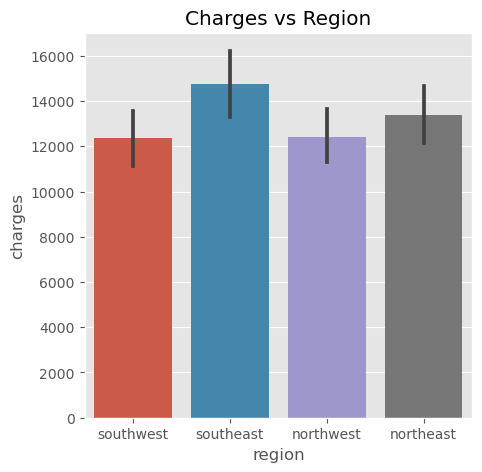

In [92]:
plt.figure(figsize=(5,5)) #cost for smoker charges more in south region
sns.barplot(x= 'region', y='charges',data=data)
plt.title('Charges vs Region')

Text(0.5, 1.0, 'Charges for smoker')

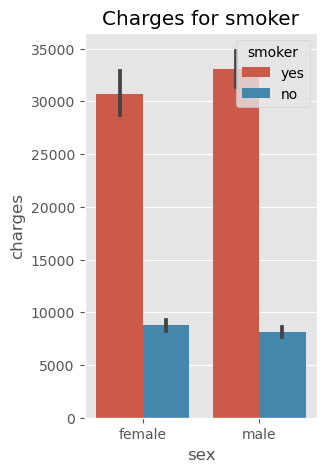

In [93]:
plt.figure(figsize=(3,5)) #medical charges more for smoker than non smoker
sns.barplot(x= 'sex', y='charges',hue='smoker', data=data)
plt.title('Charges for smoker')

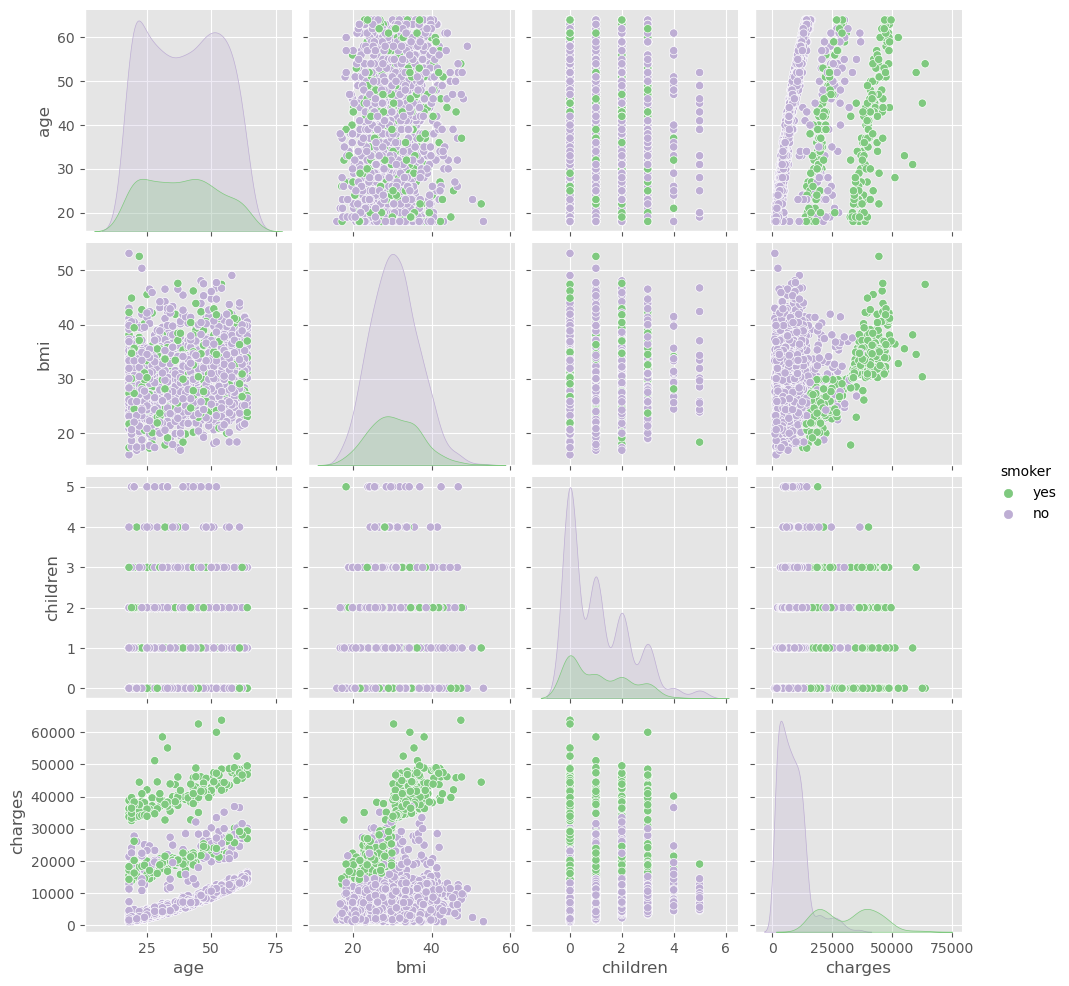

In [94]:
#Pairplot of all numerical variables
sns.pairplot(data, vars=["age", 'bmi','children','charges'],hue='smoker',palette="Accent")
plt.show()

strong coreelation between smoking and medical charges

In [95]:
#convert categorical into numeric variable
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [96]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


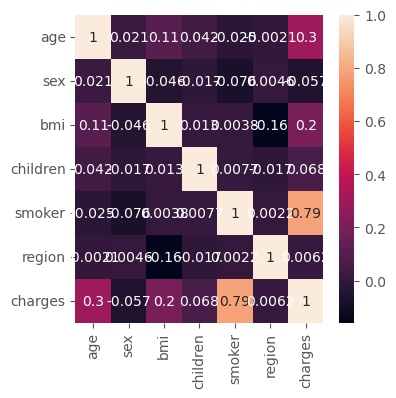

In [97]:
plt.figure(figsize=(4,4)) #correlation using heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

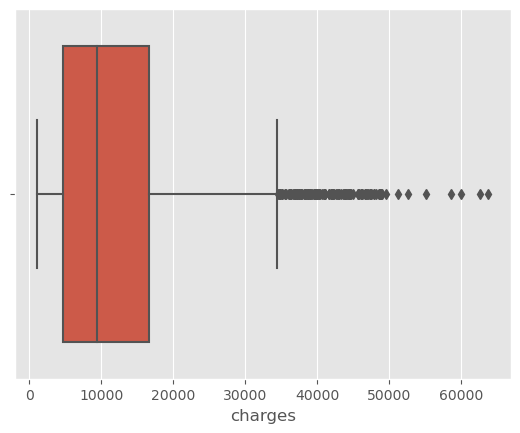

In [98]:
sns.boxplot(data['charges'])

From above boxplot we can see that outliers are present in charges column

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

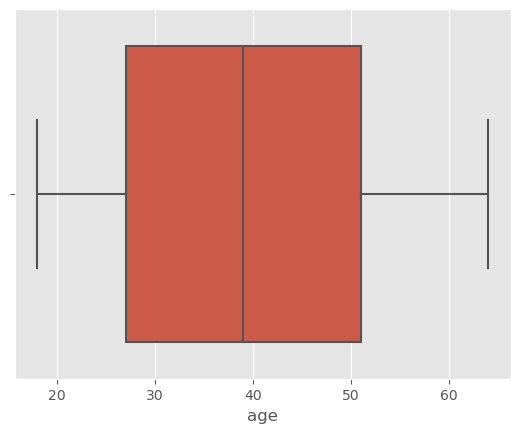

In [99]:
sns.boxplot(data.age)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

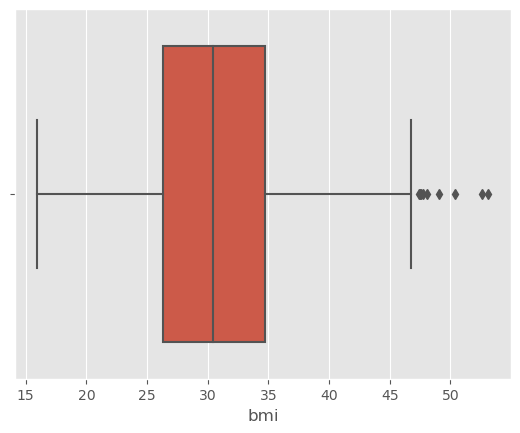

In [104]:
 #Check the outliers of bmi column 
sns.boxplot(data.bmi)

From above boxplot we can see that outliers are present in bmi column

In [114]:
# deleting outlier from the charges column
Q1 = np.quantile(data['charges'],0.25)
Q2 = np.quantile(data['charges'],0.50)
Q3 = np.quantile(data['charges'],0.75)
IQR = Q3-Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

print('lower fence is: ', + lower_fence)
print(' upper fence is: ', + upper_fence)


lower fence is:  -13109.1508975
 upper fence is:  34489.350562499996


In [116]:
df2 = data['charges'] > upper_fence
df2.value_counts()

True    1338
Name: charges, dtype: int64

In [117]:
percentage_outlier = 139 / 1338 * 100
percentage_outlier                           #only 10% outlier removed

10.388639760837071

In [118]:
# deleting outlier from the Bmi column
Q1 = np.quantile(data['bmi'],0.25)
Q2 = np.quantile(data['bmi'],0.50)
Q3 = np.quantile(data['bmi'],0.75)
IQR = Q3-Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

print(' lower fence is: ', + lower_fence)
print('upper fence is: ', + upper_fence)


 lower fence is:  13.7
upper fence is:  47.290000000000006


In [119]:
df1=data['bmi']>upper_fence
df1.value_counts()

False    1329
True        9
Name: bmi, dtype: int64

In [121]:
percentage_outlier=9/1338*100
percentage_outlier                 #only 0.67% outlier removed

0.672645739910314

<AxesSubplot:xlabel='bmi'>

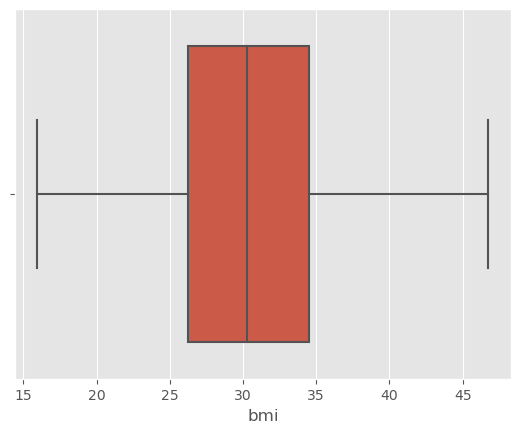

In [123]:
# Removig the outlier from bmi column
df = data.loc[(data['bmi']<= upper_fence) & (data['bmi']>= lower_fence)]
sns.boxplot(df.bmi)


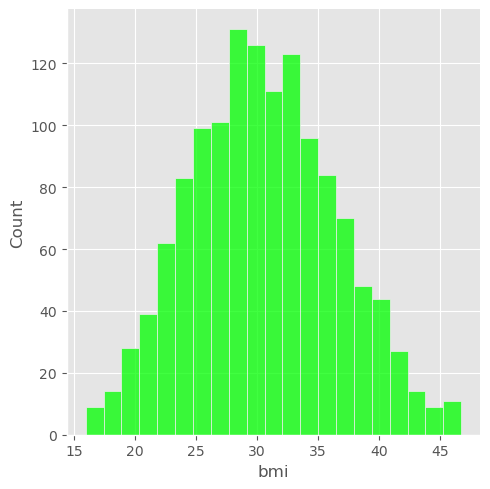

In [126]:
sns.displot(df['bmi'],kind='hist',color='lime')

In [128]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [129]:
X = df.drop(['charges'], axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [131]:
Y=df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [132]:
#standardization
x = (X - X.mean())/X.std()
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438223,1.007932,-0.445502,-0.907598,1.975126,-1.343687
1,-1.509408,-0.991384,0.546061,-0.079734,-0.505916,-0.439962
2,-0.797554,-0.991384,0.415992,1.575994,-0.505916,-0.439962
3,-0.441628,-0.991384,-1.323044,-0.907598,-0.505916,0.463762
4,-0.512813,-0.991384,-0.279960,-0.907598,-0.505916,0.463762


In [133]:
#split the data
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((930, 6), (930,), (399, 6), (399,))

In [176]:
X_train

,age,sex,bmi,children,smoker,region
423,25,0,30.590,0,0,4
931,39,1,32.500,1,0,1
693,24,0,23.655,0,0,3
866,18,0,37.290,0,0,2
760,22,1,34.580,2,0,4
...,...,...,...,...,...,...
806,40,1,41.420,1,0,3
53,36,0,34.430,0,1,2
352,30,1,27.700,0,0,1
79,41,1,32.965,0,0,3


In [177]:
Y_train

423     2727.39510
931     6238.29800
693     2352.96845
866     1141.44510
760     3925.75820
          ...     
806    28476.73499
53     37742.57570
352     3554.20300
79      6571.02435
796     4266.16580
Name: charges, Length: 930, dtype: float64

# 1. Linear Regression Model

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lr=LinearRegression()
lr

LinearRegression()

In [145]:
lr.fit(X_train,Y_train)

LinearRegression()

In [147]:
print(lr.intercept_)

-14109.475904279563


In [152]:
#print coefficient  #age-sex-bmi-children-smoker-region
print(lr.coef_)

[  256.29258058   -70.59985396   337.59149972   556.47296958
 23766.98406349   679.22281351]


In [154]:
# Making predictions using the model
y_pred = lr.predict(X_test)
print(y_pred)

[ 6.11279908e+03  3.09232739e+03  2.69882333e+04  6.09723851e+03
  9.65481522e+03  1.42152117e+04  3.69246667e+04  4.05822033e+04
  2.34588944e+03  1.52033725e+02  4.89127235e+03  8.19715295e+03
  1.27611226e+04  3.33883171e+04  5.02577277e+03  7.24308651e+03
  3.16493183e+04  4.70659579e+03  8.60236244e+03  2.98184853e+04
  1.15422856e+04  4.07762385e+03  1.10774377e+04  3.52432239e+03
  3.28024330e+02  3.64511571e+04  5.24518984e+03  1.84334620e+04
  3.51896690e+04  1.35117761e+04  2.39375688e+04  8.81352225e+03
  1.20814969e+04  4.53738140e+03  3.83959559e+04  2.53821991e+04
  5.23452984e+03  1.33809893e+04  1.04231400e+04  1.29661757e+03
  7.98017002e+03  4.04038337e+04  1.34937802e+04  3.00331015e+04
  1.45304890e+04  2.89685000e+04  8.16955063e+03  1.70387764e+04
  1.31198836e+04  1.06318358e+04  1.43062954e+03  3.72133180e+04
  8.70146273e+02  1.04717866e+04  5.13608042e+03  4.95873399e+03
  2.03380226e+03  3.68792280e+04  5.19798369e+03  7.74616240e+03
  9.46476886e+03  8.78375

# Performance Metrics

In [166]:
from sklearn.metrics import r2_score,mean_squared_error

In [167]:
mse=mean_squared_error(Y_test,y_pred)
mse

33808341.71376009

In [173]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y_test,y_pred)
mae

4143.47305620965

In [194]:
rmse=np.sqrt(mean_squared_error( Y_test,y_pred))
rmse

5814.494106434376

In [169]:
# Calculate R square value
r2=r2_score(Y_test,y_pred)
r2

0.7569837103407061

In [171]:
## Adusted r2 
# Display adjusted r2
1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7532640732540843

In [175]:
df4 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df4

,Actual,Predicted
1104,20420.60465,6112.799083
453,1769.53165,3092.327392
1291,34828.65400,26988.233344
1277,4357.04365,6097.238505
523,5397.61670,9654.815215
...,...,...
668,45710.20785,39072.531273
482,1622.18850,2375.129836
57,34303.16720,27437.064887
674,46200.98510,38152.064340


# 2. Ridge Regression Model 

In [179]:
from sklearn.linear_model import Ridge

In [181]:
ridge=Ridge()
ridge

Ridge()

In [182]:
ridge.fit(X_train,Y_train)


Ridge()

In [186]:
print(ridge.intercept_)

-14073.415778941217


In [187]:
print(ridge.coef_)

[  256.13646241   -81.84794539   337.80266664   557.45039171
 23607.32621667   679.3713114 ]


In [243]:
# Making predictions using the model

ridge_pred = ridge.predict(X_test)
ridge_pred

array([ 6149.52410755,  3131.98969606, 26869.18760072,  6123.77929959,
        9681.95908245, 14251.02568201, 36788.96441348, 40459.35644007,
        2383.77904347,   178.68946318,  4928.61923167,  8239.40501938,
       12783.92088649, 33256.09859669,  5051.55969156,  7272.55202905,
       31530.64966635,  4747.26431921,  8632.32169569, 29690.04607747,
       11573.44041014,  4117.50590037, 11111.88876848,  3551.38163794,
         355.07003511, 36320.5309721 ,  5282.63437451, 18459.75780019,
       35054.84971357, 13546.92083599, 23817.36089636,  8842.69380179,
       12118.2749066 ,  4573.24118808, 38260.17758484, 25248.53355528,
        5265.23740753, 13402.82951811, 10450.44446143,  1335.47307376,
        8009.46372718, 40281.50815522, 13518.53533951, 29900.32639577,
       14553.80124691, 28837.34355337,  8195.48204055, 17075.17800969,
       13144.09195203, 10656.50306799,  1468.53942966, 37089.94251144,
         909.99369729, 10499.44153572,  5172.30766124,  4994.49731805,
      

## Performance Metrics

In [189]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [190]:
mse=mean_squared_error(Y_test,ridge_pred)
mse

33786014.109826565

In [191]:
mae=mean_absolute_error(Y_test,ridge_pred)
mae

4157.202801017448

In [195]:
rmse=np.sqrt(mean_squared_error( Y_test,ridge_pred))
rmse

5812.573793925249

In [198]:
r2=r2_score(Y_test,ridge_pred)
r2

0.7571442024320026

In [197]:
# Display Adjusted r2
1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7534270218569823

# 3. Lasso regression model

In [199]:
from sklearn.linear_model import Lasso

In [201]:
lasso=Lasso()
lasso

Lasso()

In [204]:
lasso.fit(X_train,Y_train)

Lasso()

In [207]:
print(lasso.intercept_)

-14106.359786400491


In [208]:
print(lasso.coef_)

[  256.28310725   -67.11001233   337.56883381   555.92834296
 23761.23486031   678.38426697]


In [210]:
# Prediction for data set
lasso_pred = lasso.predict(X_test)
lasso_pred

array([ 6.11405070e+03,  3.09206443e+03,  2.69837907e+04,  6.10035171e+03,
        9.65852891e+03,  1.42142820e+04,  3.69225274e+04,  4.05758571e+04,
        2.34650821e+03,  1.54160805e+02,  4.89017301e+03,  8.19428666e+03,
        1.27639817e+04,  3.33862761e+04,  5.03006747e+03,  7.24508505e+03,
        3.16436410e+04,  4.70573266e+03,  8.60507813e+03,  2.98165371e+04,
        1.15433440e+04,  4.07890383e+03,  1.10784874e+04,  3.52817196e+03,
        3.31424333e+02,  3.64479346e+04,  5.24597697e+03,  1.84352656e+04,
        3.51845232e+04,  1.35102836e+04,  2.39299299e+04,  8.81397090e+03,
        1.20795468e+04,  4.53633675e+03,  3.83935582e+04,  2.53790092e+04,
        5.23838563e+03,  1.33854391e+04,  1.04263180e+04,  1.29646744e+03,
        7.98213454e+03,  4.03974840e+04,  1.34976611e+04,  3.00320478e+04,
        1.45324441e+04,  2.89643869e+04,  8.17158751e+03,  1.70370703e+04,
        1.31242891e+04,  1.06334681e+04,  1.43209497e+03,  3.72066675e+04,
        8.69010247e+02,  

In [211]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [212]:
mse=mean_squared_error(Y_test,lasso_pred)
mse

33804081.788728766

In [213]:
mae=mean_absolute_error(Y_test,lasso_pred)
mae

4143.505670066629

In [214]:
RMSE= np.sqrt(mean_squared_error( Y_test,lasso_pred))
RMSE

5814.127775404387

In [217]:
r2=r2_score(Y_test,lasso_pred)
r2

0.7570143309249425

In [218]:
# Display Adjusted r2
1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7532951625207325

# Elastic net Regression Model

In [220]:
from sklearn.linear_model import ElasticNet

In [221]:
elasticnet= ElasticNet()
elasticnet 

ElasticNet()

In [222]:
elasticnet.fit(X_train,Y_train)

ElasticNet()

In [223]:
print(elasticnet.coef_)

[ 238.21646341 -464.60911132  357.68929961  546.26112689 5762.07269589
  535.46830214]


In [224]:
print(elasticnet.intercept_)

-9826.591346884026


In [230]:
# Making predictions using the model

elasticnet_pred=elasticnet.predict(X_test)
elasticnet_pred

array([10182.02722983,  7180.03415162, 13480.4190123 ,  9574.02260125,
       13327.57902995, 17762.58168705, 22234.37767585, 26322.78820738,
        6406.67941461,  3414.02518181,  8568.54533206, 12041.21558221,
       15801.27805426, 19087.51020017,  8630.47451352, 10801.40755137,
       17932.30384649,  8780.3964242 , 12359.12781028, 15938.50119882,
       15077.38061617,  8492.36752025, 14875.54784714,  7162.96793425,
        3894.69183372, 22079.33958424,  9286.09432096, 21632.14033484,
       19964.35645192, 16902.23768059,  9642.22114299, 12001.97543877,
       15543.47325853,  8060.25039681, 23624.09543597, 10669.72499609,
        9310.82039788, 16626.42476645, 13998.30220273,  5310.75448199,
       11515.70386243, 26200.46768717, 16935.92784789, 15850.0753693 ,
       17458.45538985, 14323.69480938, 11349.68531602, 20539.20864863,
       16616.44634707, 13617.70335831,  5654.45600704, 22810.00499271,
        4772.21352957, 14193.187135  ,  8474.57529804,  8514.20182328,
      

## Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [237]:
print(mean_squared_error(Y_test,elasticnet_pred))

84110011.25444576


In [238]:
print(mean_absolute_error(Y_test,elasticnet_pred))

7286.932304681049


In [239]:
rmse=np.sqrt(mean_squared_error(Y_test,elasticnet_pred))
rmse

9171.151032146716

In [240]:
r2=r2_score(Y_test,elasticnet_pred)
r2

0.39541243899763123

In [242]:
# Adjusted r2
1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.386158547757799

# conclusion

The R2 value of 0.75 indicates that the model explains about 75% of the variance, 
which suggests a reasonably good fit to the data.in linear regression .
it shows 75% accuracy through linear,ridge,lasso regression not go through elasticnet regression.